In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [139]:
data=pd.read_csv("G://DataScience project practice//diabetes.csv")

In [141]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [145]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [147]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [149]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [151]:
dia = data[(data['Glucose']>120) & (data["Age"]== 25)]  

In [153]:
dia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
45,0,180,66,39,0,42.0,1.893,25,1
120,0,162,76,56,100,53.2,0.759,25,1
189,5,139,80,35,160,31.6,0.361,25,1
266,0,138,0,0,0,36.3,0.933,25,1
301,2,144,58,33,135,31.6,0.422,25,1
308,0,128,68,19,180,30.5,1.391,25,1
370,3,173,82,48,465,38.4,2.137,25,1
384,1,125,70,24,110,24.3,0.221,25,0
395,2,127,58,24,275,27.7,1.600,25,0
399,3,193,70,31,0,34.9,0.241,25,1


In [155]:
sure = data[(data['Glucose']>120) & (data["BMI"]>=25) & (data["Age"]>=25)] 

In [157]:
sure

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
4,0,137,40,35,168,43.1,2.288,33,1
8,2,197,70,45,543,30.5,0.158,53,1
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [159]:
sure.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
4,0,137,40,35,168,43.1,2.288,33,1
8,2,197,70,45,543,30.5,0.158,53,1
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
20,3,126,88,41,235,39.3,0.704,27,0
22,7,196,90,0,0,39.8,0.451,41,1
24,11,143,94,33,146,36.6,0.254,51,1


In [161]:
data["Glucose"]

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [163]:
a= data[(data['Glucose']==0)]
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [165]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [167]:
data[data["Glucose"].isin([0])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [169]:
data[data["BloodPressure"].isin([0])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [171]:
data[data["BMI"].isin([0])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [173]:
data[data["Age"].isin([0])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [175]:
data.Glucose.mean()

120.89453125

In [177]:
data.BloodPressure.mean()

69.10546875

In [179]:
data.BMI.mean()

31.992578124999998

In [181]:
X = data.drop('Outcome', axis=1)
Y = data["Outcome"]

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [185]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
580,0,151,90,46,0,42.1,0.371,21
418,1,83,68,0,0,18.2,0.624,27
764,2,122,70,27,0,36.8,0.340,27
363,4,146,78,0,0,38.5,0.520,67
757,0,123,72,0,0,36.3,0.258,52
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [187]:
Y_train

580    1
418    0
764    0
363    1
757    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 537, dtype: int64

In [189]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
165,6,104,74,18,156,29.9,0.722,41
188,8,109,76,39,114,27.9,0.640,31
334,1,95,60,18,58,23.9,0.260,22
758,1,106,76,0,0,37.5,0.197,26


In [191]:
Y_test

661    1
122    0
113    0
14     1
529    0
      ..
165    1
188    1
334    0
758    0
34     0
Name: Outcome, Length: 231, dtype: int64

In [193]:
len(X_test),len(Y_test),len(X_train),len(Y_train)

(231, 231, 537, 537)

In [195]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [197]:
Y_train_pred = regressor.predict(X_train)
print(Y_train_pred)

[ 5.42089179e-01 -1.03147724e-01  3.77565165e-01  7.17036539e-01
  4.12173282e-01  2.38198962e-01  8.18621211e-01  2.14539958e-01
  9.27338101e-01  3.90742290e-01  5.18798740e-01  2.25320939e-01
  2.88236046e-01  2.40128487e-01  4.36864133e-01  2.11830955e-01
  6.76749356e-01  3.79819984e-01  4.22731622e-01  3.66437610e-01
  6.16220605e-01 -4.78790313e-02  4.93629525e-01  3.19936796e-01
  1.01889129e+00  3.91904612e-01  3.53817745e-01  1.57273174e-01
  3.59453176e-01  3.25746312e-01  3.91910368e-03  2.27103971e-01
  3.22022900e-01  7.10802465e-01 -1.77546860e-01  3.97558897e-01
  9.05125252e-01  3.36997224e-01  7.16873030e-02 -3.92462257e-03
 -1.33750300e-01  2.57609936e-01  5.07542152e-01  4.69274008e-01
  4.36133987e-01 -1.50553976e-01  3.53628832e-01  4.40926858e-01
  1.56491565e-01  2.17283168e-01  5.36408413e-01  3.73124219e-01
  1.87282819e-01  2.56274776e-01  7.65958924e-02 -2.64455049e-01
  6.59394361e-02  1.45951712e-01  7.64095029e-01  6.29461024e-01
  3.75141131e-01  2.54915

In [199]:
accuracy = regressor.score(X_test, Y_test)
print(accuracy)

0.2893011726554


In [201]:
mse = mean_squared_error(Y_train, Y_train_pred)
print(mse)

0.1606302439161478


In [203]:
print(regressor.intercept_)
print(regressor.coef_)

-0.8890530999021466
[ 0.014549    0.00582505 -0.00221674  0.00099143 -0.00021791  0.01354565
  0.12428557  0.00424189]


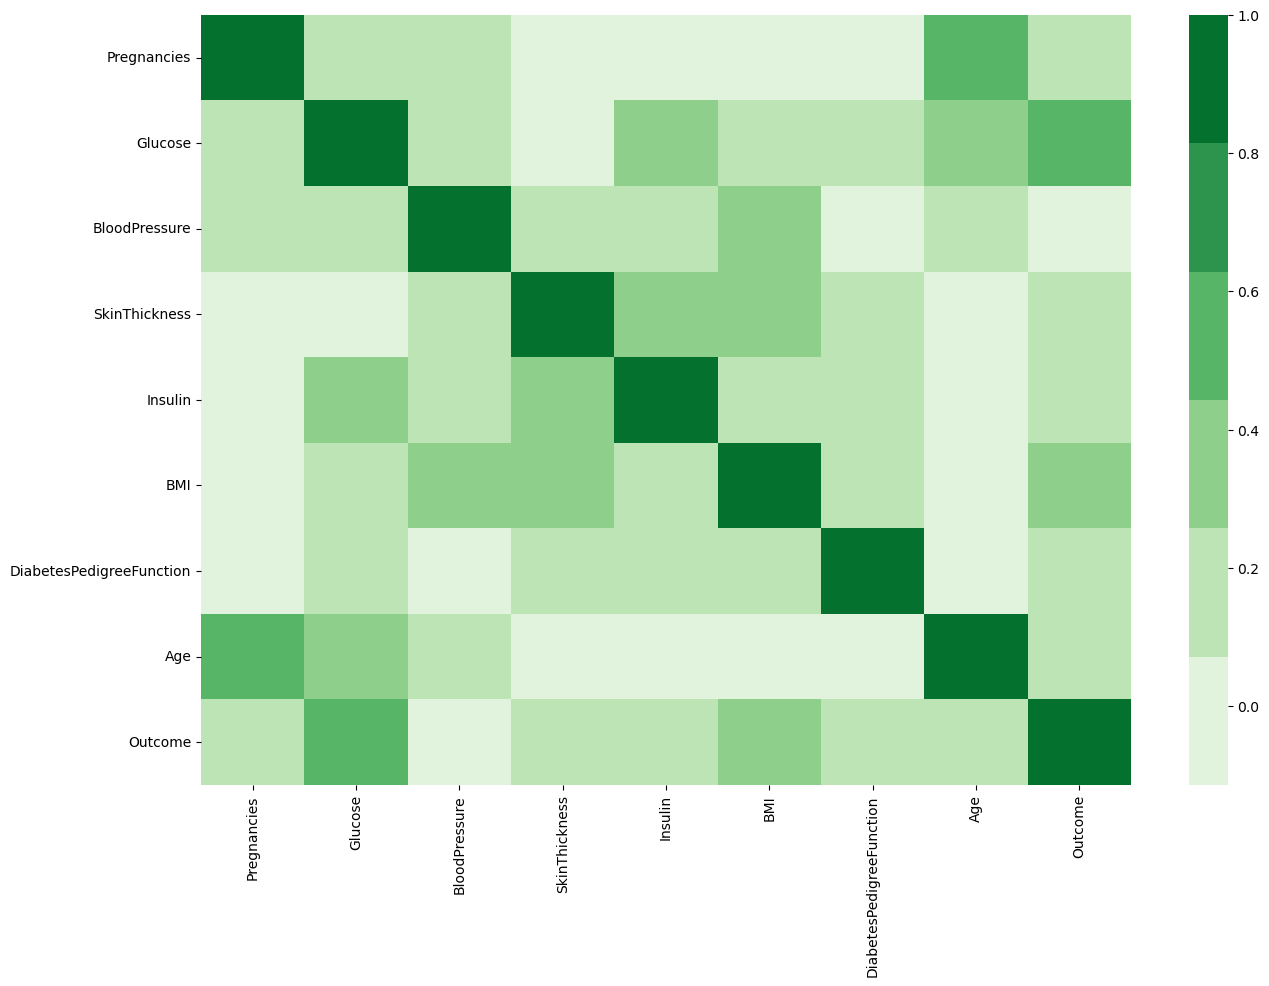

In [205]:
plt.figure(figsize=(15,10)) 
colormap = sns.color_palette("Greens") 
heat=sns.heatmap(df1.corr(), cmap=colormap)

#                       ********** Trying with replacing 0's **********

## Replacing the 0 values to mean

In [209]:
df1 = data.replace(to_replace=0, value = np.nan)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,NaN
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,NaN
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


In [211]:
df1.Glucose.mean()

121.6867627785059

In [213]:
df1.BloodPressure.mode()

0    70.0
Name: BloodPressure, dtype: float64

In [215]:
df1.BMI.mode()

0    32.0
Name: BMI, dtype: float64

## filling different values in different columns

In [218]:
df1.fillna({'Glucose':121.68,
           'BloodPressure':70,
           "BMI":32})
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,NaN
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,NaN
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


In [220]:
df1[df1["BMI"].isin([0])] # rechecking if there is 0 present

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [222]:
df1[df1["Glucose"].isin([0])] # rechecking if there is 0 present

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [224]:
df1[df1["BloodPressure"].isin([0])] # rechecking if there is 0 present

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [226]:
df1[df1["Age"].isin([0])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [228]:
df1.isna().sum() # rechecking whole data set

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [230]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   268 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


## now replace the rest value with mean or 0

In [233]:
df1=df1.fillna(value=0)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47,1.0


In [235]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [237]:
X = df1.drop('Outcome', axis=1)
Y = df1["Outcome"]

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [241]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
580,0.0,151.0,90.0,46.0,0.0,42.1,0.371,21
418,1.0,83.0,68.0,0.0,0.0,18.2,0.624,27
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27
363,4.0,146.0,78.0,0.0,0.0,38.5,0.520,67
757,0.0,123.0,72.0,0.0,0.0,36.3,0.258,52
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
192,7.0,159.0,66.0,0.0,0.0,30.4,0.383,36
629,4.0,94.0,65.0,22.0,0.0,24.7,0.148,21
559,11.0,85.0,74.0,0.0,0.0,30.1,0.300,35


In [243]:
Y_train

580    1.0
418    0.0
764    0.0
363    1.0
757    1.0
      ... 
763    0.0
192    1.0
629    0.0
559    0.0
684    0.0
Name: Outcome, Length: 537, dtype: float64

In [245]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1.0,199.0,76.0,43.0,0.0,42.9,1.394,22
122,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23
113,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51
529,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
165,6.0,104.0,74.0,18.0,156.0,29.9,0.722,41
188,8.0,109.0,76.0,39.0,114.0,27.9,0.640,31
334,1.0,95.0,60.0,18.0,58.0,23.9,0.260,22
758,1.0,106.0,76.0,0.0,0.0,37.5,0.197,26


In [247]:
Y_test

661    1.0
122    0.0
113    0.0
14     1.0
529    0.0
      ... 
165    1.0
188    1.0
334    0.0
758    0.0
34     0.0
Name: Outcome, Length: 231, dtype: float64

In [249]:
len(X_test),len(Y_test),len(X_train),len(Y_train)

(231, 231, 537, 537)

In [251]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [253]:
Y_train_pred = regressor.predict(X_train)
print(Y_train_pred)

[ 5.42089179e-01 -1.03147724e-01  3.77565165e-01  7.17036539e-01
  4.12173282e-01  2.38198962e-01  8.18621211e-01  2.14539958e-01
  9.27338101e-01  3.90742290e-01  5.18798740e-01  2.25320939e-01
  2.88236046e-01  2.40128487e-01  4.36864133e-01  2.11830955e-01
  6.76749356e-01  3.79819984e-01  4.22731622e-01  3.66437610e-01
  6.16220605e-01 -4.78790313e-02  4.93629525e-01  3.19936796e-01
  1.01889129e+00  3.91904612e-01  3.53817745e-01  1.57273174e-01
  3.59453176e-01  3.25746312e-01  3.91910368e-03  2.27103971e-01
  3.22022900e-01  7.10802465e-01 -1.77546860e-01  3.97558897e-01
  9.05125252e-01  3.36997224e-01  7.16873030e-02 -3.92462257e-03
 -1.33750300e-01  2.57609936e-01  5.07542152e-01  4.69274008e-01
  4.36133987e-01 -1.50553976e-01  3.53628832e-01  4.40926858e-01
  1.56491565e-01  2.17283168e-01  5.36408413e-01  3.73124219e-01
  1.87282819e-01  2.56274776e-01  7.65958924e-02 -2.64455049e-01
  6.59394361e-02  1.45951712e-01  7.64095029e-01  6.29461024e-01
  3.75141131e-01  2.54915

In [255]:
accuracy = regressor.score(X_test, Y_test)
print(accuracy)

0.2893011726554


In [257]:
mse = mean_squared_error(Y_train, Y_train_pred)
print(mse)

0.1606302439161478


In [259]:
print(regressor.intercept_)
print(regressor.coef_)

-0.8890530999021466
[ 0.014549    0.00582505 -0.00221674  0.00099143 -0.00021791  0.01354565
  0.12428557  0.00424189]


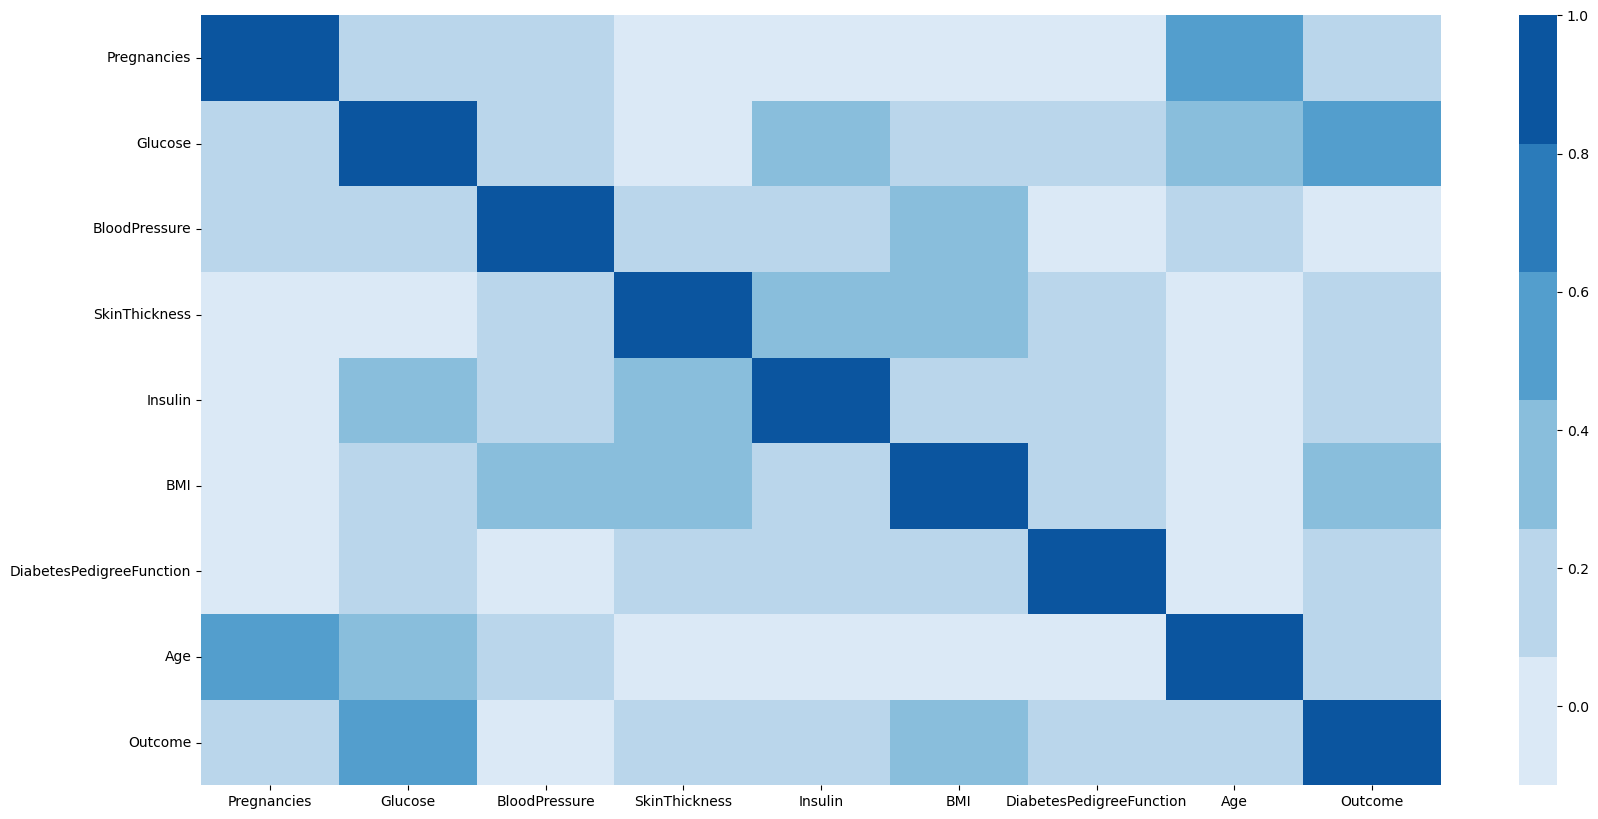

In [261]:
plt.figure(figsize=(20,10)) 
colormap = sns.color_palette("Blues") 
heat=sns.heatmap(df1.corr(), cmap=colormap)

# Trying with droping null data

In [264]:
tr = pd.read_csv("G://DataScience project practice//diabetes.csv")

In [266]:
tr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [268]:
tr.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [270]:
tr1 = tr.replace(to_replace=0, value = np.nan)

In [272]:
tr1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [290]:
tr1.dropna(how='any',inplace=True)

In [292]:
tr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 6 to 755
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               111 non-null    float64
 1   Glucose                   111 non-null    float64
 2   BloodPressure             111 non-null    float64
 3   SkinThickness             111 non-null    float64
 4   Insulin                   111 non-null    float64
 5   BMI                       111 non-null    float64
 6   DiabetesPedigreeFunction  111 non-null    float64
 7   Age                       111 non-null    int64  
 8   Outcome                   111 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 8.7 KB


In [295]:
tr1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1.0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,1.0
19,1.0,115.0,70.0,30.0,96.0,34.6,0.529,32,1.0


In [297]:
X = tr1.drop('Outcome', axis=1)
Y = tr1["Outcome"]

In [299]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [301]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
189,5.0,139.0,80.0,35.0,160.0,31.6,0.361,25
25,10.0,125.0,70.0,26.0,115.0,31.1,0.205,41
298,14.0,100.0,78.0,25.0,184.0,36.6,0.412,46
638,7.0,97.0,76.0,32.0,91.0,40.9,0.871,32
722,1.0,149.0,68.0,29.0,127.0,29.3,0.349,42
...,...,...,...,...,...,...,...,...
732,2.0,174.0,88.0,37.0,120.0,44.5,0.646,24
419,3.0,129.0,64.0,29.0,115.0,26.4,0.219,28
402,5.0,136.0,84.0,41.0,88.0,35.0,0.286,35
296,2.0,146.0,70.0,38.0,360.0,28.0,0.337,29


In [303]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
693,7.0,129.0,68.0,49.0,125.0,38.5,0.439,43
53,8.0,176.0,90.0,34.0,300.0,33.7,0.467,58
498,7.0,195.0,70.0,33.0,145.0,25.1,0.163,55
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59
165,6.0,104.0,74.0,18.0,156.0,29.9,0.722,41
709,2.0,93.0,64.0,32.0,160.0,38.0,0.674,23
292,2.0,128.0,78.0,37.0,182.0,43.3,1.224,31
31,3.0,158.0,76.0,36.0,245.0,31.6,0.851,28
111,8.0,155.0,62.0,26.0,495.0,34.0,0.543,46
614,11.0,138.0,74.0,26.0,144.0,36.1,0.557,50


In [305]:
Y_test

693    1.0
53     1.0
498    1.0
13     1.0
165    1.0
709    1.0
292    1.0
31     1.0
111    1.0
614    1.0
612    1.0
152    1.0
259    1.0
309    1.0
370    1.0
326    1.0
88     1.0
480    1.0
646    1.0
369    1.0
659    1.0
39     1.0
175    1.0
360    1.0
198    1.0
14     1.0
730    1.0
603    1.0
Name: Outcome, dtype: float64

In [307]:
Y_train

189    1.0
25     1.0
298    1.0
638    1.0
722    1.0
      ... 
732    1.0
419    1.0
402    1.0
296    1.0
287    1.0
Name: Outcome, Length: 83, dtype: float64

In [309]:
len(X_test),len(Y_test),len(X_train),len(Y_train)

(28, 28, 83, 83)

In [311]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [313]:
Y_train_pred = regressor.predict(X_train)
print(Y_train_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [315]:
accuracy = regressor.score(X_test, Y_test)
print(accuracy)

1.0


In [317]:
mse = mean_squared_error(Y_train, Y_train_pred)
print(mse)

0.0


In [319]:
print(regressor.intercept_)
print(regressor.coef_)

1.0
[0. 0. 0. 0. 0. 0. 0. 0.]


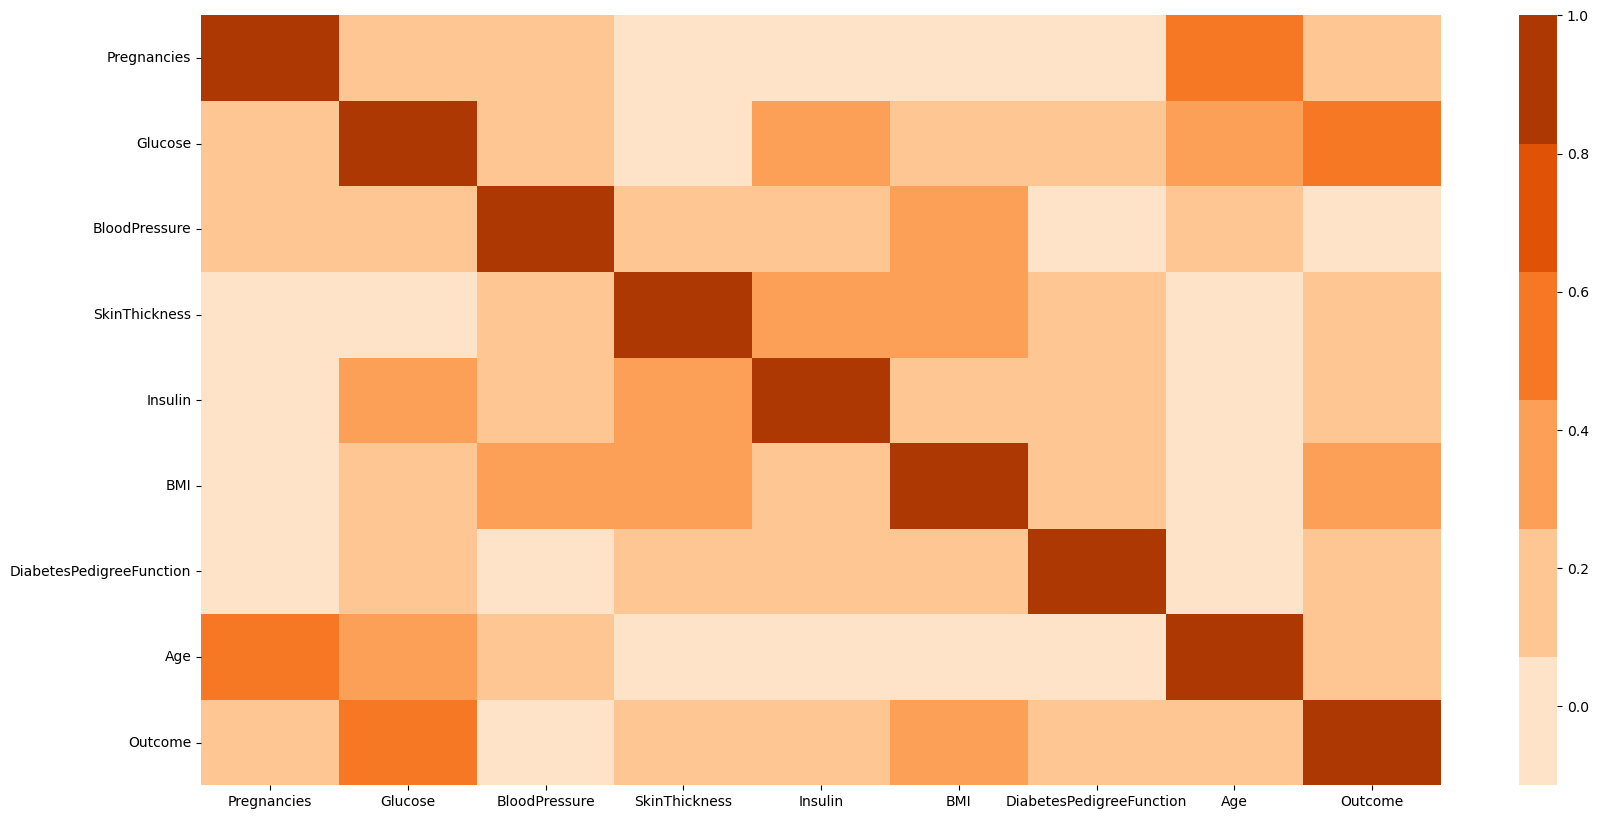

In [321]:
plt.figure(figsize=(20,10)) 
colormap = sns.color_palette("Oranges") 
heat=sns.heatmap(df1.corr(), cmap=colormap)

# Trying another algorithm for better accuracy

In [6]:
tr = pd.read_csv("G://DataScience project practice//diabetes.csv")

In [8]:
tr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X = tr.iloc[:,[0,1,2,3,4,5,6,7]].values    # X values for traing data 
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [16]:
Y = tr.iloc[:,8].values
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size= 0.3 , random_state= 0) # testing data 

In [22]:
X_train

array([[0.00e+00, 1.51e+02, 9.00e+01, ..., 4.21e+01, 3.71e-01, 2.10e+01],
       [1.00e+00, 8.30e+01, 6.80e+01, ..., 1.82e+01, 6.24e-01, 2.70e+01],
       [2.00e+00, 1.22e+02, 7.00e+01, ..., 3.68e+01, 3.40e-01, 2.70e+01],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 0.00e+00, 6.40e-01, 6.90e+01]])

In [24]:
X_test

array([[1.000e+00, 1.990e+02, 7.600e+01, ..., 4.290e+01, 1.394e+00,
        2.200e+01],
       [2.000e+00, 1.070e+02, 7.400e+01, ..., 3.360e+01, 4.040e-01,
        2.300e+01],
       [4.000e+00, 7.600e+01, 6.200e+01, ..., 3.400e+01, 3.910e-01,
        2.500e+01],
       ...,
       [1.000e+00, 9.500e+01, 6.000e+01, ..., 2.390e+01, 2.600e-01,
        2.200e+01],
       [1.000e+00, 1.060e+02, 7.600e+01, ..., 3.750e+01, 1.970e-01,
        2.600e+01],
       [1.000e+01, 1.220e+02, 7.800e+01, ..., 2.760e+01, 5.120e-01,
        4.500e+01]])

In [26]:
Y_train

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [28]:
Y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [32]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predict)
print(cm) 

[[141  16]
 [ 35  39]]


In [42]:
accuracy_score(Y_test,y_predict)

0.7792207792207793

In [44]:
mse = mean_squared_error(Y_test,y_predict)
print(mse)

0.22077922077922077
